In [149]:
pip install pandas requests

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [150]:
import requests
import time
from bs4 import BeautifulSoup
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [151]:
# URL 
resource_url = 'https://companies-market-cap-copy.vercel.app/index.html'

response = requests.get(resource_url, time.sleep(10))
if response.status_code == 200:  # If the status code is 200 (OK)
    print(f"Access granted: {response.status_code}")
else:
    print(f'Error accessing the page: {response.status.code}')

html = response.text  

Access granted: 200


In [152]:
html

'\n<!DOCTYPE html>\n<html lang="en-US">\n<head>\n<title>Tesla (TSLA) - Revenue</title>\n<meta charset="utf-8"/>\n<link rel="shortcut icon" href="https://companiesmarketcap.com/favicon.ico" type="image/x-icon">\n<link rel="apple-touch-icon" sizes="57x57" href="/img/icons/apple-icon-57x57.png">\n<link rel="apple-touch-icon" sizes="60x60" href="/img/icons/apple-icon-60x60.png">\n<link rel="apple-touch-icon" sizes="72x72" href="/img/icons/apple-icon-72x72.png">\n<link rel="apple-touch-icon" sizes="76x76" href="/img/icons/apple-icon-76x76.png">\n<link rel="apple-touch-icon" sizes="114x114" href="/img/icons/apple-icon-114x114.png">\n<link rel="apple-touch-icon" sizes="120x120" href="/img/icons/apple-icon-120x120.png">\n<link rel="apple-touch-icon" sizes="144x144" href="/img/icons/apple-icon-144x144.png">\n<link rel="apple-touch-icon" sizes="152x152" href="/img/icons/apple-icon-152x152.png">\n<link rel="apple-touch-icon" sizes="180x180" href="/img/icons/apple-icon-180x180.png">\n<link rel="ic

In [ ]:
# Parsing the HTML into a BeautifulSoup object for easy data extraction
soup = BeautifulSoup(html, "html.parser")

In [154]:
# Extracting the income table
table = soup.find("table")  

table

<table class="table" style="width:100%">
<thead>
<tr>
<th>Year</th>
<th>Revenue</th>
<th>Change</th>
</tr>
</thead>
<tbody>
<tr><td><span class="year">2024</span></td><td>$97.15 B</td><td class="percentage-green">0.39%</td></tr><tr><td><span class="year">2023</span> </td><td>$96.77 B</td><td class="percentage-green">18.8%</td></tr><tr><td><span class="year">2022</span></td><td>$81.46 B</td><td class="percentage-green">51.35%</td></tr><tr><td><span class="year">2021</span></td><td>$53.82 B</td><td class="percentage-green">70.67%</td></tr><tr><td><span class="year">2020</span></td><td>$31.53 B</td><td class="percentage-green">28.31%</td></tr><tr><td><span class="year">2019</span></td><td>$24.57 B</td><td class="percentage-green">14.52%</td></tr><tr><td><span class="year">2018</span></td><td>$21.46 B</td><td class="percentage-green">82.51%</td></tr><tr><td><span class="year">2017</span></td><td>$11.75 B</td><td class="percentage-green">67.98%</td></tr><tr><td><span class="year">2016</span

In [155]:
# Extracting ALL rows 

rows = table.find_all("tr")

data = []
for row in rows[1:]: 
    cols = row.find_all("td")
    date = cols[0].text.strip()
    revenue = cols[1].text.strip()
    data.append([date, revenue])

data

[['2024', '$97.15 B'],
 ['2023', '$96.77 B'],
 ['2022', '$81.46 B'],
 ['2021', '$53.82 B'],
 ['2020', '$31.53 B'],
 ['2019', '$24.57 B'],
 ['2018', '$21.46 B'],
 ['2017', '$11.75 B'],
 ['2016', '$7.00 B'],
 ['2015', '$4.04 B'],
 ['2014', '$3.19 B'],
 ['2013', '$2.01 B'],
 ['2012', '$0.41 B'],
 ['2011', '$0.20 B'],
 ['2010', '$0.11 B'],
 ['2009', '$0.11 B']]

In [ ]:
# Cleaning up the data
cleaned_data = []
for date, revenue in data:
    # Removing ALL "$" and "B" from revenue, and striping any extra spaces
    revenue = revenue.replace('$', '').replace('B', '').strip()
    
    # Skiping rows where the revenue is empty
    if revenue:
        cleaned_data.append([date, revenue])  

print(cleaned_data)

[['2024', '97.15'], ['2023', '96.77'], ['2022', '81.46'], ['2021', '53.82'], ['2020', '31.53'], ['2019', '24.57'], ['2018', '21.46'], ['2017', '11.75'], ['2016', '7.00'], ['2015', '4.04'], ['2014', '3.19'], ['2013', '2.01'], ['2012', '0.41'], ['2011', '0.20'], ['2010', '0.11'], ['2009', '0.11']]


In [157]:
data = cleaned_data

In [ ]:
data = pd.DataFrame(data, columns=["Date", "Revenue"])

# Sorting the data by the 'Date' column in ascending order 
data = data.sort_values("Date")

data.head()

,Date,Revenue
15,2009,0.11
14,2010,0.11
13,2011,0.20
12,2012,0.41
11,2013,2.01


In [159]:
# Connecting to SQLite and saving the data
conn = sqlite3.connect("tsla_revenues.db")
cursor = conn.cursor()

In [160]:
# Creating a table in SQLite
cursor.execute("""
CREATE TABLE IF NOT EXISTS revenue (
    date TEXT,
    revenue REAL
)
""")

In [161]:
for index, row in data.iterrows():
    cursor.execute("INSERT INTO revenue (date, revenue) VALUES (?, ?)", (row["Date"], row["Revenue"]))

conn.commit()

# Closing the connection
conn.close()

print("Data was successfully stored in the 'tsla_revenue' table!")

Data was successfully stored in the 'tsla_revenue' table!


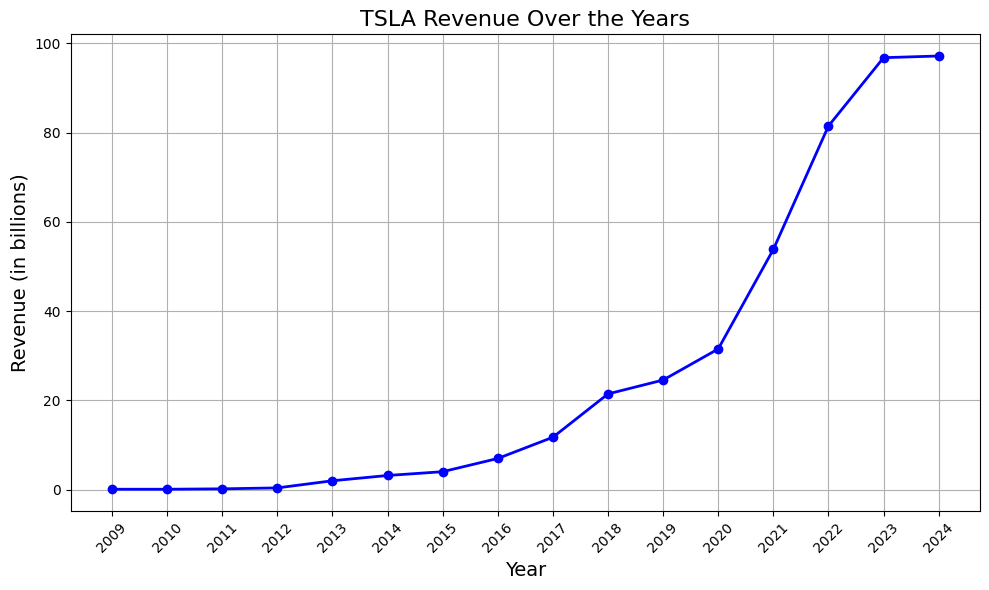

In [ ]:
# Creating a Linear Graph to show the change in TSLA revenue over the years
plt.figure(figsize=(10, 6))  
plt.plot(data['Date'], data['Revenue'], marker='o', color='blue', linestyle='-', linewidth=2)  

plt.title('TSLA Revenue Over the Years', fontsize=16)  
plt.xlabel('Year', fontsize=14)  
plt.ylabel('Revenue (in billions)', fontsize=14)  
plt.xticks(rotation=45)  
plt.grid(True)  

plt.tight_layout()
plt.savefig('tsla_revenue_plot.png', format='png')
plt.show()

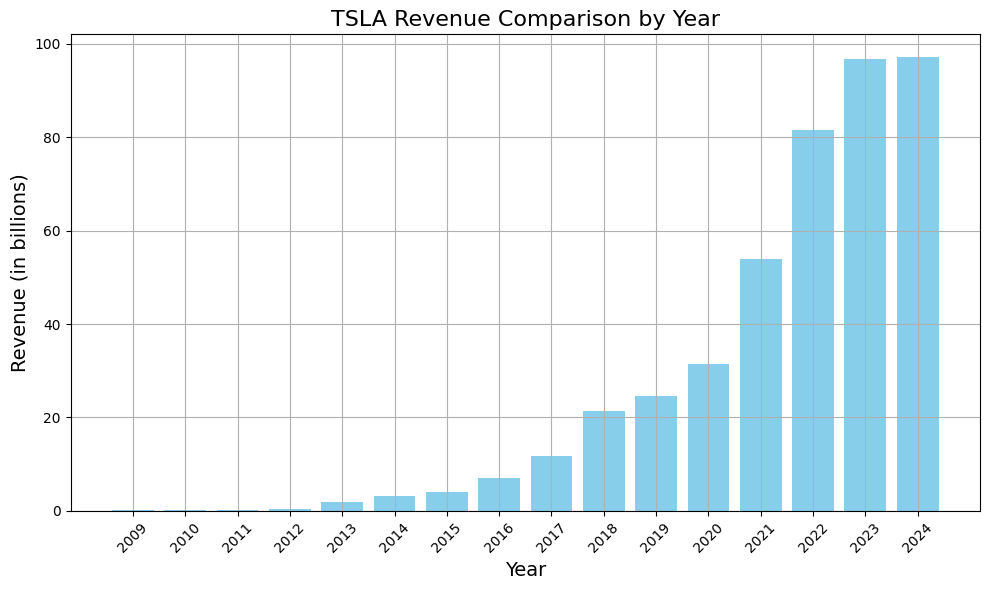

In [ ]:
# Bar Graph to compare Tesla revenue throughout the years
plt.figure(figsize=(10, 6))
plt.bar(data['Date'], data['Revenue'], color='skyblue')
plt.title('TSLA Revenue Comparison by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Revenue (in billions)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

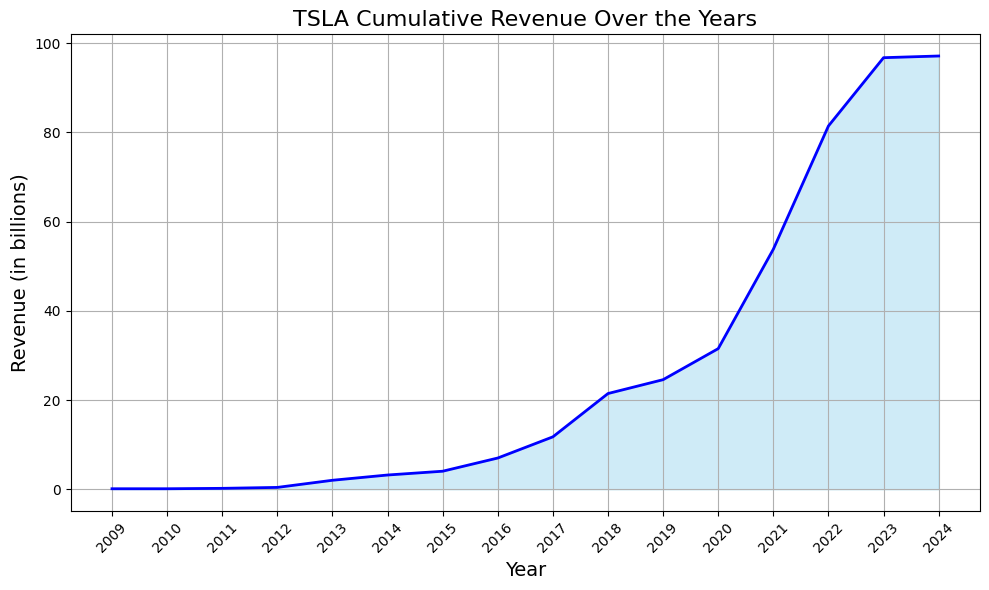

In [167]:
# Area plot to show cumulative TSLA revenue
plt.figure(figsize=(10, 6))
plt.fill_between(data['Date'], data['Revenue'], color='skyblue', alpha=0.4)
plt.plot(data['Date'], data['Revenue'], color='blue', linewidth=2)
plt.title('TSLA Cumulative Revenue Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Revenue (in billions)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('tsla_revenue_area_plot.png')
plt.show()
